In [28]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Display options
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)


In [29]:
# 1. Read the data into DataFrames from the URLs

# URLs of the Netflix data files
show_info_url = "https://joannabieri.com/data210/YeegIJKsC1QJLM_Exam1/data/show_info.csv"
netflix_data_url = "https://joannabieri.com/data210/YeegIJKsC1QJLM_Exam1/data/netflix_data.csv"

# Read both CSV files
df_info = pd.read_csv(show_info_url)
df_net = pd.read_csv(netflix_data_url)

# Look at the first few rows of data
df_info.head()
df_net.head()


,Unnamed: 0,show_id,title,date_added,duration,listed_in,description
0,0,s1,Dick Johnson Is Dead,"September 25, 2021",90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,1,s2,Blood & Water,"September 24, 2021",2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,2,s3,Ganglands,"September 24, 2021",1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,3,s4,Jailbirds New Orleans,"September 24, 2021",1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,4,s5,Kota Factory,"September 24, 2021",2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


In [30]:
# 2. Merge the two DataFrames together

# Checking each data's collumns before merging
print("df_info columns:", df_info.columns.tolist())
print("df_net columns:", df_net.columns.tolist())

# If both DataFrames have a 'show_id' column, use it to merge
if 'show_id' in df_info.columns and 'show_id' in df_net.columns:
    df = df_info.merge(df_net, on='show_id', how='outer', indicator=True)
else:
    # If not, merge on 'title'
    df = df_info.merge(df_net, on='title', how='outer', indicator=True)

# Check how many rows matched and how many were unique
print(df['_merge'].value_counts())

# Remove the helper column
df.drop(columns=['_merge'], inplace=True)


df_info columns: ['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country', 'release_year', 'rating']
df_net columns: ['Unnamed: 0', 'show_id', 'title', 'date_added', 'duration', 'listed_in', 'description']
_merge
both          8807
left_only        0
right_only       0
Name: count, dtype: int64


In [31]:
# 3. Get information about number of variables, observations, and data types

print("Shape (rows, columns):", df.shape)

df.info(memory_usage='deep')


Shape (rows, columns): (8807, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0_x  8807 non-null   int64 
 1   show_id       8807 non-null   object
 2   type          8807 non-null   object
 3   title_x       8807 non-null   object
 4   director      6173 non-null   object
 5   cast          7982 non-null   object
 6   country       7976 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   Unnamed: 0_y  8807 non-null   int64 
 10  title_y       8807 non-null   object
 11  date_added    8797 non-null   object
 12  duration      8804 non-null   object
 13  listed_in     8807 non-null   object
 14  description   8807 non-null   object
dtypes: int64(3), object(12)
memory usage: 8.5 MB


In [32]:
# 4. Descriptive statistics

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0_x,8807.0,4403.000000,2542.506244,0.0,2201.5,4403.0,6604.5,8806.0
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
Unnamed: 0_y,8807.0,4403.000000,2542.506244,0.0,2201.5,4403.0,6604.5,8806.0


In [33]:
# 5. Value counts for categorical data

# Find all categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

# Looking at the most common values in certain categorical columns
for c in ['type', 'rating', 'release_year', 'country'] if set(['type', 'rating', 'release_year', 'country']).issubset(df.columns) else cat_cols[:5]:
    if c in df.columns:
        print(f"\nValue counts for '{c}':")
        print(df[c].value_counts(dropna=False).head(30))


Categorical columns: ['show_id', 'type', 'title_x', 'director', 'cast', 'country', 'rating', 'title_y', 'date_added', 'duration', 'listed_in', 'description']

Value counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value counts for 'rating':
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Value counts for 'release_year':
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
2001      45
1999      39
1997      38
2000      37
1998      36
1993      28
1

In [36]:
# 6. Count missing values (NaNs) and decide if they are a problem

# Count how many missing values each column has
na_counts = df.isnull().sum().sort_values(ascending=False)
print("Columns with missing values:\n", na_counts[na_counts > 0])

# Percentage of missing values
missing_percent = (na_counts / len(df)).round(3) * 100
print("\nPercent of missing data (top 30 columns):")
print(missing_percent.head(30))



Columns with missing values:
 director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

Percent of missing data (top 30 columns):
director        29.9
country          9.4
cast             9.4
date_added       0.1
rating           0.0
duration         0.0
Unnamed: 0_x     0.0
show_id          0.0
type             0.0
title_x          0.0
release_year     0.0
Unnamed: 0_y     0.0
title_y          0.0
listed_in        0.0
description      0.0
dtype: float64


In [37]:
# 7. Create dummy variables for columns with multiple values in one cell

def make_dummies(series, sep=',', prefix=None):
    s = series.fillna('').apply(lambda x: [i.strip() for i in x.split(sep) if i.strip()])
    # Get all unique labels across rows
    labels = sorted({label for row in s for label in row})
    
    # Create a 0/1 DataFrame and mark where 1 appears
    dummy_df = pd.DataFrame(0, index=series.index, columns=labels)
    for i, vals in s.items():
        for v in vals:
            dummy_df.at[i, v] = 1
    if prefix:
        dummy_df.columns = [f"{prefix}_{c}" for c in dummy_df.columns]
    
    return dummy_df

# Make dummies for 'country' and 'listed_in'
if 'country' in df.columns:
    country_dummies = make_dummies(df['country'], prefix='country')

if 'listed_in' in df.columns:
    category_dummies = make_dummies(df['listed_in'], prefix='listed')

# Show top 30 countries by number of credited titles
if 'country' in df.columns:
    country_counts = country_dummies.sum().sort_values(ascending=False)
    print("Top countries by credited content:")
    print(country_counts.head(30))


Top countries by credited content:
country_United States     3690
country_India             1046
country_United Kingdom     806
country_Canada             445
country_France             393
country_Japan              318
country_Spain              232
country_South Korea        231
country_Germany            226
country_Mexico             169
country_China              162
country_Australia          160
country_Egypt              117
country_Turkey             113
country_Hong Kong          105
country_Nigeria            103
country_Italy              100
country_Brazil              97
country_Argentina           91
country_Belgium             90
country_Indonesia           90
country_Taiwan              89
country_Philippines         83
country_Thailand            70
country_South Africa        62
country_Colombia            52
country_Netherlands         50
country_Denmark             48
country_Ireland             46
country_Sweden              42
dtype: int64


In [38]:
# 8. Crosstabulation

if set(['type', 'rating']).issubset(df.columns):
    
    # Create a table showing how many titles fall into each type/rating combo
    ct = pd.crosstab(df['type'], df['rating'], dropna=False)
    print("Counts of ratings by type:\n", ct)

    # Show proportions to see rating distribution
    print("\nProportions (row-wise):")
    print(ct.div(ct.sum(axis=1), axis=0).round(3))



Counts of ratings by type:
 rating   66 min  74 min  84 min   G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  \
type                                                                           
Movie         1       1       1  41      3  75  287    490  797   1427   126   
TV Show       0       0       0   0      0   5    0      0    2    733    94   

rating   TV-MA  TV-PG  TV-Y  TV-Y7  TV-Y7-FV  UR  NaN  
type                                                   
Movie     2062    540   131    139         5   3    2  
TV Show   1145    323   176    195         1   0    2  

Proportions (row-wise):
rating   66 min  74 min  84 min      G  NC-17     NR     PG  PG-13      R  \
type                                                                        
Movie       0.0     0.0     0.0  0.007    0.0  0.012  0.047   0.08  0.130   
TV Show     0.0     0.0     0.0  0.000    0.0  0.002  0.000   0.00  0.001   

rating   TV-14   TV-G  TV-MA  TV-PG   TV-Y  TV-Y7  TV-Y7-FV   UR    NaN  
type               

In [39]:
# 9. Convert a string date column to Timestamp objects

if 'date_added' in df.columns:
    
    # Look at a few examples of the date format
    print(df['date_added'].dropna().sample(5).tolist())

    # Convert 'date_added' to datetime
    df['date_added_ts'] = pd.to_datetime(df['date_added'], errors='coerce')

    # Check first few converted values
    print(df['date_added_ts'].head())

    # Count all that failed to convert
    print("Number of invalid/missing dates:", df['date_added_ts'].isnull().sum())



['November 22, 2019', 'April 14, 2021', 'August 1, 2019', 'November 7, 2018', 'May 15, 2018']
0   2021-09-25
1   2021-09-24
2   2021-09-07
3   2021-04-22
4   2021-04-22
Name: date_added_ts, dtype: datetime64[ns]
Number of invalid/missing dates: 98


type             Movie  TV Show
date_added_year                
2008                 1        1
2009                 2        0
2010                 1        0
2011                13        0
2012                 3        0
2013                 6        4
2014                19        4
2015                56       17
2016               253      165
2017               839      325
2018              1237      388
2019              1424      575
2020              1284      594
2021               993      505


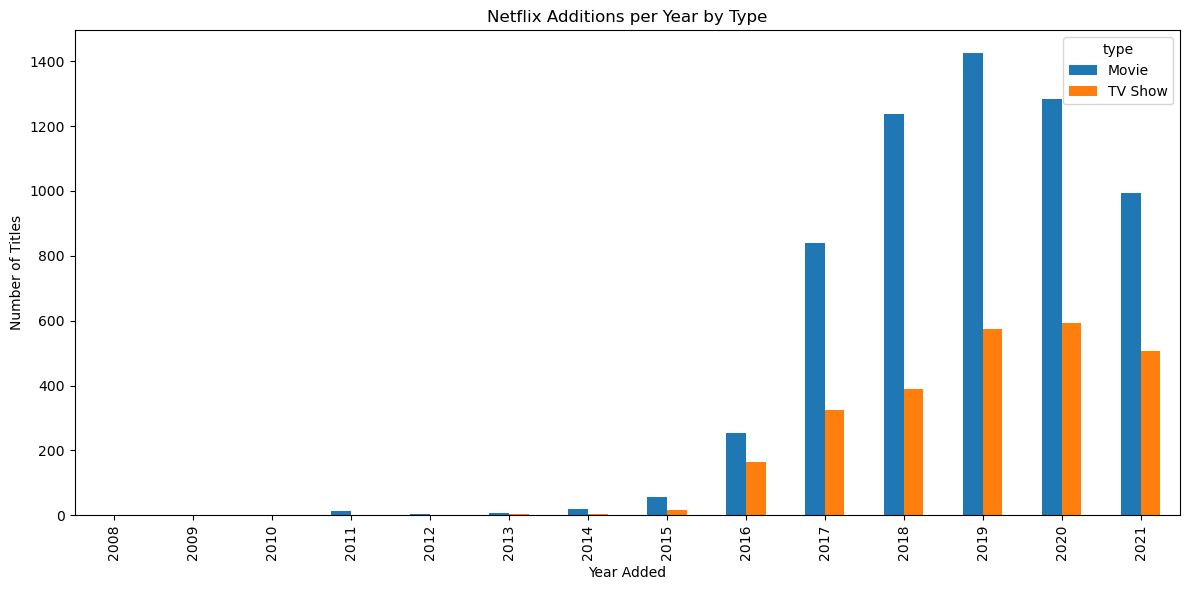

In [40]:
# 10. Group by year to look at how content changes over time

if 'date_added_ts' in df.columns and 'type' in df.columns:
    # Extract year
    df['date_added_year'] = df['date_added_ts'].dt.to_period('Y')

    # Count how many Movies and TV shows were added each year
    yearly_type_counts = df.groupby(['date_added_year', 'type']).size().unstack(fill_value=0)

    # Show most recent years
    print(yearly_type_counts.tail(20))

    # Plot
    yearly_type_counts.plot(kind='bar', figsize=(12,6))
    plt.title('Netflix Additions per Year by Type')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles')
    plt.tight_layout()
    plt.show()



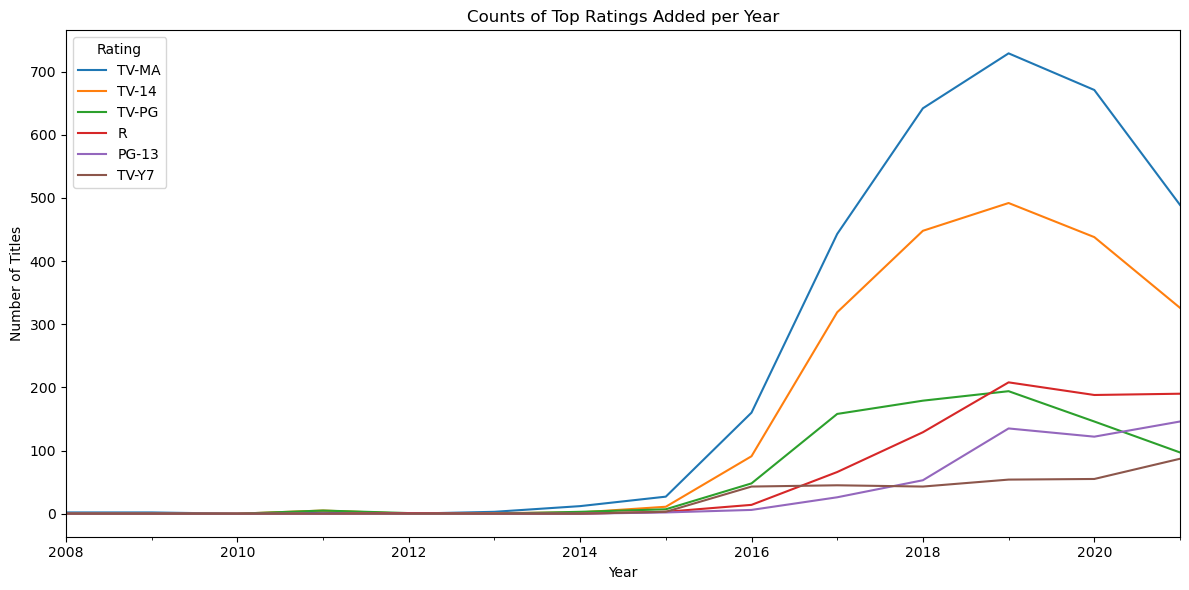

In [41]:
# 11. Analyze how content ratings changed over time

if 'rating' in df.columns and 'date_added_year' in df.columns:
    # Table showing counts of each rating per year
    rating_by_year = pd.crosstab(df['date_added_year'], df['rating'])
    rating_by_year_norm = rating_by_year.div(rating_by_year.sum(axis=1), axis=0)
    
    # Common ratings
    top_ratings = rating_by_year.sum().sort_values(ascending=False).head(6).index.tolist()
    
    # Plot
    rating_by_year[top_ratings].plot(figsize=(12,6))
    plt.title('Counts of Top Ratings Added per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.legend(title='Rating')
    plt.tight_layout()
    plt.show()


In [42]:
# 12. Find the most common categories for a given year

def top_categories_by_year(year, content_type=None, top_n=10):
    
    # Filter by year
    year_period = pd.Period(str(year), freq='Y')
    df_year = df[df['date_added_year'] == year_period]

    # Filter by type or moovie
    if content_type:
        df_year = df_year[df_year['type'] == content_type]

    # Check and expand the 'listed_in' column
    if 'listed_in' not in df_year.columns:
        print("No 'listed_in' column found.")
        return None

    # Split and count category labels
    dummies = multi_label_dummies(df_year['listed_in'], sep=',')
    top = dummies.sum().sort_values(ascending=False).head(top_n)
    return top
    

In [43]:
# 13. Find which actors appeared most often

if 'cast' in df.columns:
    
    # Keep useful collumns
    cast_df = df[['title_x', 'release_year', 'date_added_year', 'cast', 'country']].copy()

    # Split the cast list into individual names
    cast_df['cast_list'] = (
        cast_df['cast']
        .fillna('')
        .apply(lambda x: [a.strip() for a in x.split(',') if a.strip()])
    )

    exploded = cast_df.explode('cast_list').rename(columns={'cast_list': 'actor'})
    exploded = exploded[exploded['actor'] != '']

    # Overall appearences
    actor_counts = exploded['actor'].value_counts()
    print("Top 20 actors appearing in the most Netflix titles:")
    print(actor_counts.head(20))

    # Count per year
    top_by_year = (
        exploded.groupby(['release_year', 'actor'])
        .size()
        .reset_index(name='count')
    )

    # Function to get top actors for a given year
    def top_actor_in_year(year, top_n=5):
        t = (
            top_by_year[top_by_year['release_year'] == year]
            .sort_values('count', ascending=False)
            .head(top_n)
        )
        return t

    # Top 5 actors in 2019
    print("\nTop actors in 2019:")
    print(top_actor_in_year(2019))

else:
    print("No 'cast' column found in DataFrame.")


Top 20 actors appearing in the most Netflix titles:
actor
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Rajesh Kava          26
Vincent Tong         26
Andrea Libman        25
Kareena Kapoor       25
John Cleese          24
Samuel L. Jackson    24
Jigna Bhardwaj       23
Fred Tatasciore      23
Name: count, dtype: int64

Top actors in 2019:
       release_year               actor  count
47885          2019        Vincent Tong      8
45870          2019        Michela Luci      7
41843          2019  Alessandro Juliani      7
44806          2019       Kathleen Barr      7
47630          2019     Tiffany Haddish      7


In [44]:
# 14. Find interesting outliers or extremes in the dataset

# Longest and shortest durations
if 'duration' in df.columns:
    
    # Convert durationinto numeric values
    def to_minutes(x):
        if pd.isna(x):
            return np.nan
        s = str(x)
        if 'min' in s:
            return int(s.split()[0])
        elif 'Season' in s:
            return int(s.split()[0]) * 60
        else:
            return np.nan

    df['duration_min'] = df['duration'].apply(to_minutes)

    # Top 10 longest entries
    print("Top 10 longest titles:")
    print(df[['title_x', 'duration', 'duration_min']]
          .sort_values('duration_min', ascending=False)
          .head(10))

# Oldest and newest release years
if 'release_year' in df.columns:
    print("\nOldest release year:", df['release_year'].min())
    print("Newest release year:", df['release_year'].max())

    print("\nMost common release years:")
    print(df['release_year'].value_counts().head(10))



Top 10 longest titles:
                     title_x    duration  duration_min
4989          Grey's Anatomy  17 Seasons        1020.0
1584            Supernatural  15 Seasons         900.0
4221                    NCIS  15 Seasons         900.0
396                Heartland  13 Seasons         780.0
3581  COMEDIANS of the world  13 Seasons         780.0
7609            Red vs. Blue  13 Seasons         780.0
4406       Trailer Park Boys  12 Seasons         720.0
4905          Criminal Minds  12 Seasons         720.0
6440                 Frasier  11 Seasons         660.0
6064                  Cheers  11 Seasons         660.0

Oldest release year: 1925
Newest release year: 2021

Most common release years:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64


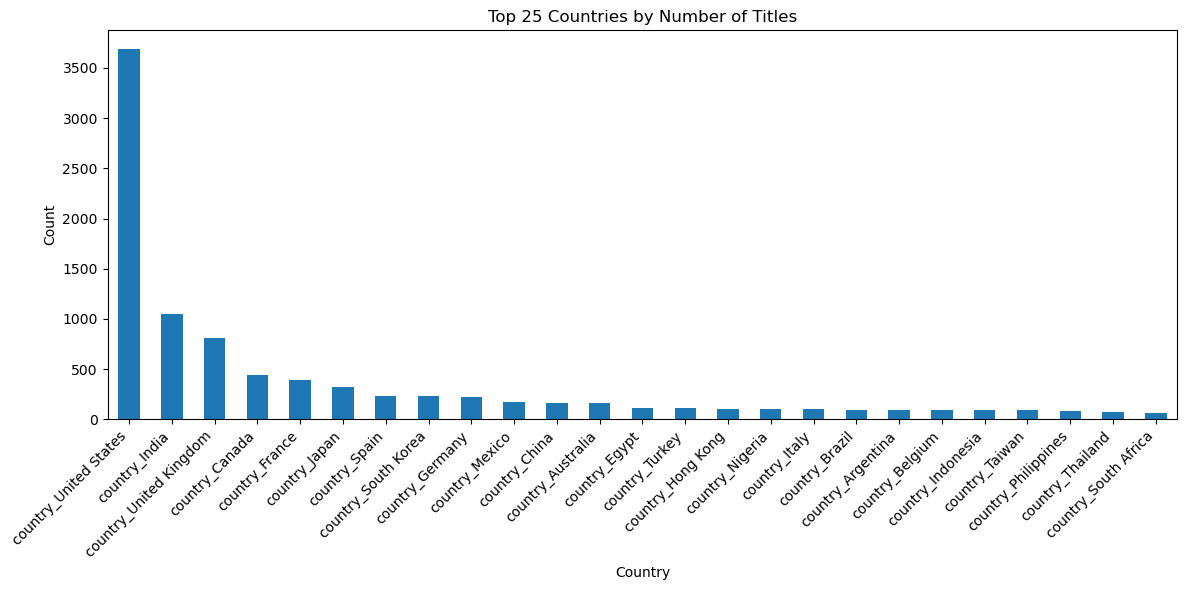

<Figure size 1200x600 with 0 Axes>

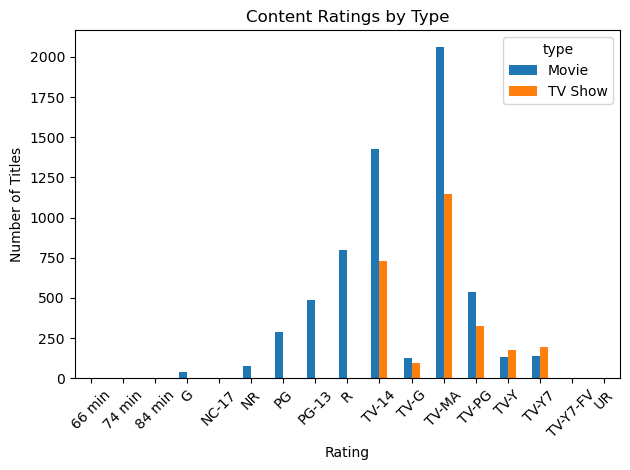

C:\Users\ambsc\AppData\Local\Temp\ipykernel_8080\3073799832.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('date_added_ts').resample('M').size()


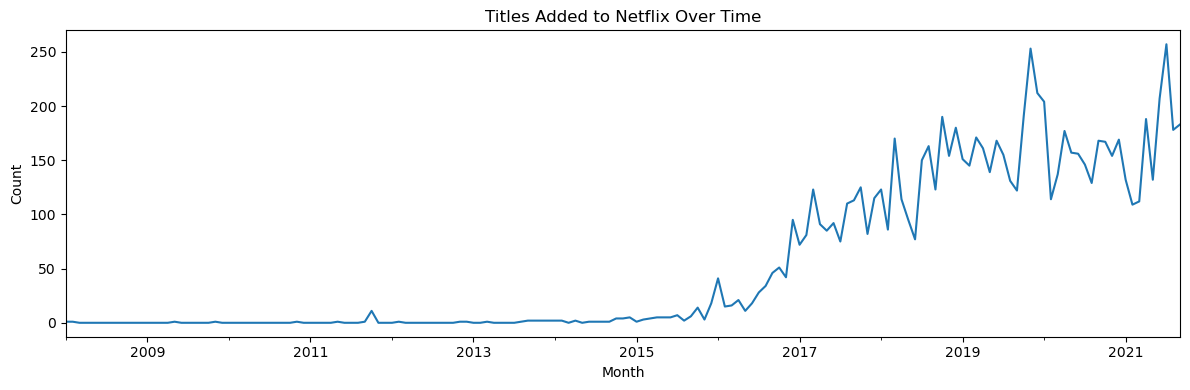

In [45]:
# 15. Visualizing key trends in the Netflix dataset

# a. Top countries by number of titles
if 'country' in df.columns:
    plt.figure(figsize=(12,6))
    country_counts.head(25).plot(kind='bar')
    plt.title('Top 25 Countries by Number of Titles')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# b. Rating distribution by content type
if {'type', 'rating'}.issubset(df.columns):
    plt.figure(figsize=(12,6))
    pd.crosstab(df['rating'], df['type']).plot(kind='bar')
    plt.title('Content Ratings by Type')
    plt.xlabel('Rating')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# c. Growth over time — titles added per month
if 'date_added_ts' in df.columns:
    monthly = df.set_index('date_added_ts').resample('M').size()
    plt.figure(figsize=(12,4))
    monthly.plot()
    plt.title('Titles Added to Netflix Over Time')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



Insights:

a. The chart shows that the United States, India, and the United Kingdom produce the most Netflix titles

b. TV shows are mostly rated TV-MA or TV-14, while movies span a wider range of ratings

c. The line plot reveals a rapid increase in titles added after 2015, peaking around 2020